In [2]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
df = pd.read_csv("Replaced.csv",encoding="ISO-8859-1")

In [4]:
df.to_csv("data.csv",encoding="UTF-8")

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'reviewsdate', 'dateSeen', 'didPurchase', 'doRecommend', 'reviews_id',
       'reviews.numHelpful', 'rating', 'sourceURLs', 'text', 'title',
       'userCity', 'userProvince', 'username', 'upc'],
      dtype='object')

In [6]:
def get_hash(x):
  return abs(hash(x)) % 10**9
df['username'] = df['username'].apply(get_hash)
df['id'] = df['id'].apply(get_hash)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'reviewsdate', 'dateSeen', 'didPurchase', 'doRecommend', 'reviews_id',
       'reviews.numHelpful', 'rating', 'sourceURLs', 'text', 'title',
       'userCity', 'userProvince', 'username', 'upc'],
      dtype='object')

In [8]:
dataset = df[['id','username','rating']]
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:, 2].values

In [9]:
print(X)

[[719036666]
 [947718788]
 [947718788]
 ...
 [264912043]
 [527784192]
 [478651307]]


In [10]:
print(y)

[5 5 5 ... 5 5 5]


In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

C:\Users\jinan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
regressor = DecisionTreeRegressor(random_state = 0,max_depth=5)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [13]:
# Predicting a new result
y_pred = regressor.predict(X)

In [14]:
y_pred

array([4.48242091, 4.528     , 4.528     , ..., 4.11309524, 4.39516129,
       4.39516129])

In [20]:
print(y_pred.shape)
print(y.shape)

(71003,)
(71003,)


In [27]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report

In [26]:
#accuracy_score(y, y_pred)

In [25]:
#print(classification_report(y,y_pred))

In [13]:
import matplotlib.pyplot as plt

In [14]:
X.shape

(71003, 1)

No handles with labels found to put in legend.


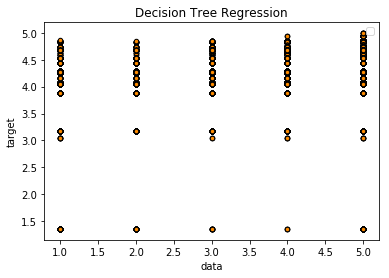

In [18]:
# Plot the results
plt.figure()
plt.scatter(y, y_pred, s=20, edgecolor="black",
            c="darkorange")
#plt.plot(X_test, y_1, color="cornflowerblue",
#       label="max_depth=2", linewidth=2)
#plt.plot(y, y_pred, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [24]:
## Logistic Regression for Recommendation System

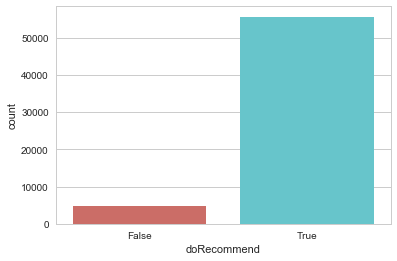

In [26]:
sns.countplot( x = df['doRecommend'], data = df, palette = 'hls')
plt.show()


In [27]:
## There are aproximately 55000 true’s and 5000 false’s in the outcome variables.

In [28]:
df.groupby('doRecommend').mean()

,Unnamed: 0,id,reviews_id,reviews.numHelpful,rating,username
doRecommend,,,,,,
False,42354.156308,5.068101e+08,7.569005e+07,0.540349,1.928557,4.918456e+08
True,33506.604040,4.567491e+08,7.149876e+07,0.391785,4.686269,5.009909e+08


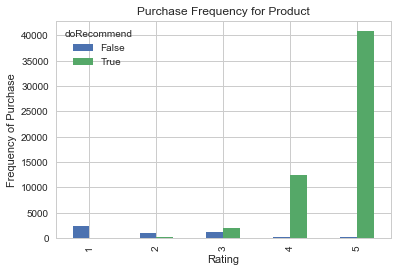

In [35]:
%matplotlib inline
pd.crosstab(df.rating,df.doRecommend).plot(kind='bar')
plt.title('Purchase Frequency for Product')
plt.xlabel('Rating')
plt.ylabel('Frequency of Purchase')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df, y,test_size=0.2)
X_train= X_train[['id','username','rating','didPurchase','doRecommend']]
print(y_train)
#y_train= y_train[['id','username','rating','didPurchase','doRecommend']]

[5 5 5 ... 4 5 4]


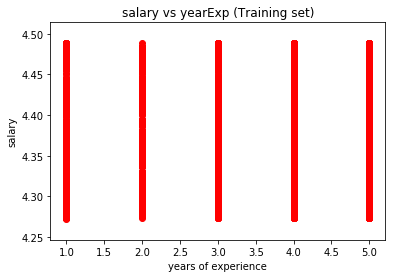

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

#predecting the test set results
y_pred = regressor.predict(X)

#Visualization of the training set results
plt.scatter(y, y_pred, color = 'red')
#plt.plot(y, y_pred, color = 'green')
plt.title('salary vs yearExp (Training set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

In [60]:
from sklearn import svm
from scipy.sparse.linalg import svds

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0.001).fit(X, y)

In [74]:
n_users = df.username.unique().shape[0]
n_items = df.id.unique().shape[0]

In [77]:
print ('Number of users = ' + str(n_users) + ' | Number of products = ' + str(n_items))

Number of users = 58089 | Number of products = 600


In [28]:
#from sklearn.metrics.pairwise import pairwise_distances
#user_similarity = pairwise_distances(X_train, metric='cosine')
#item_similarity = pairwise_distances(X_train.T, metric='cosine')

In [29]:
#U, sigma, Vt = svds(df)

### Random Forest Classifier

In [19]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier


In [49]:
df = pd.read_csv("training.csv")

In [50]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber',
       'name', 'reviewsdate', 'dateSeen', 'didPurchase', 'doRecommend',
       'reviews_id', 'reviews.numHelpful', 'rating', 'sourceURLs', 'text',
       'title', 'userCity', 'userProvince', 'username', 'upc'],
      dtype='object')

In [51]:
df['didPurchase'].fillna(True)

0         True
1        False
2         True
3         True
4         True
5        False
6        False
7         True
8        False
9         True
10        True
11        True
12       False
13        True
14        True
15       False
16        True
17        True
18       False
19       False
20       False
21       False
22        True
23       False
24       False
25        True
26       False
27        True
28        True
29       False
         ...  
56772    False
56773    False
56774     True
56775     True
56776     True
56777     True
56778     True
56779     True
56780     True
56781    False
56782     True
56783    False
56784    False
56785     True
56786     True
56787    False
56788    False
56789     True
56790    False
56791    False
56792    False
56793     True
56794    False
56795    False
56796    False
56797     True
56798     True
56799     True
56800    False
56801     True
Name: didPurchase, Length: 56802, dtype: bool

In [52]:
df.didPurchase = (df.didPurchase)*1

In [53]:
df.doRecommend = (df.doRecommend)*1

In [54]:
df['didPurchase'].head(100)

0     NaN
1       0
2     NaN
3     NaN
4     NaN
5       0
6       0
7     NaN
8       0
9     NaN
10    NaN
11    NaN
12      0
13      1
14      1
15      0
16    NaN
17      1
18      0
19      0
20      0
21      0
22    NaN
23      0
24      0
25    NaN
26      0
27      1
28    NaN
29      0
     ... 
70    NaN
71    NaN
72      0
73      0
74      0
75    NaN
76    NaN
77    NaN
78    NaN
79      0
80    NaN
81      0
82      0
83      0
84      0
85      1
86    NaN
87    NaN
88      1
89    NaN
90      0
91      0
92      0
93      0
94    NaN
95    NaN
96      0
97      0
98      0
99    NaN
Name: didPurchase, Length: 100, dtype: object

In [55]:
df['doRecommend'] = df['doRecommend'].fillna(1)

In [56]:
df['didPurchase'] = df['didPurchase'].fillna(1)

In [57]:
df['doRecommend'].head(100)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    0
15    1
16    1
17    1
18    1
19    0
20    1
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
     ..
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    0
89    1
90    1
91    1
92    0
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: doRecommend, Length: 100, dtype: int64

In [58]:
# Create a list of the feature column's names

# Create a list of the feature column's names
features = df[['id','username','didPurchase','rating']]

# View features
features

,id,username,didPurchase,rating
0,985635257,336321266,1,5
1,683739812,731826734,0,5
2,547628512,682704279,1,5
3,840729767,708707405,1,4
4,707210344,139866001,1,5
5,410538000,182753812,0,5
6,969643954,231698588,0,5
7,436441872,122723844,1,5
8,37221070,397370713,0,2
9,840729767,429851771,1,5


In [59]:
## Train Random Forest Classifier

In [60]:
y = df['doRecommend']

In [61]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: doRecommend, dtype: int64

In [62]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the rating)
clf.fit(features, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
df_test = pd.read_csv("test.csv")

In [64]:
df_test.didPurchase = (df.didPurchase)*1

In [65]:
df_test.doRecommend = (df_test.doRecommend)*1

In [66]:
df_test['doRecommend'] = df_test['doRecommend'].fillna(1)

In [67]:
df_test['didPurchase'] = df_test['didPurchase'].fillna(1)

In [68]:
test_features = df_test[['id','didPurchase','username','rating']]

In [73]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
preds = clf.predict(test_features)

In [74]:
print(preds)

[1 1 1 ... 1 1 1]


In [72]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test_features)[0:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [77]:
# Create confusion matrix
pd.crosstab(df_test['doRecommend'], preds, rownames=['Actual Recommendation'], colnames=['Predicted Recommendation'])

Predicted Recommendation,0,1
Actual Recommendation,,
0,270,733
1,240,12958


In [78]:
# View a list of the features and their importance scores
list(zip(features, clf.feature_importances_))

[('id', 0.216036175365589),
 ('username', 0.27905615415915763),
 ('didPurchase', 0.048047674728218207),
 ('rating', 0.4568599957470352)]